## This is a demonstration of the use of GFDL catalog builder generated intake_esm catalogs on a sample experiment. Not intended for official purposes. 

### Reference: https://github.com/aradhakrishnanGFDL/canopy-cats

### Contact: Open issues here https://github.com/NOAA-GFDL/catalogbuilder

In [33]:
import xarray as xr
import intake,yaml,os
import intake_esm
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# INSERT THE LOCATION OF YOUR DATA CATALOG IN THE CELL BELOW TO EXPLORE SOMETHING ELSE

In [2]:
col_url = "/home/a1r/github/noaa-gfdl/catalogs/CM4_piControl_C.json"

In [3]:
col = intake.open_esm_datastore(col_url)

#### Explore the catalog by viewing the "data frame" (df)

In [34]:
col.df.head

<bound method NDFrame.head of         Unnamed: 0 activity_id  institution_id source_id    experiment_id  \
0                0         dev             NaN       CM4  CM4_piControl_C   
1                1         dev             NaN       CM4  CM4_piControl_C   
2                2         dev             NaN       CM4  CM4_piControl_C   
3                3         dev             NaN       CM4  CM4_piControl_C   
4                4         dev             NaN       CM4  CM4_piControl_C   
...            ...         ...             ...       ...              ...   
257568      257568         dev             NaN       CM4  CM4_piControl_C   
257569      257569         dev             NaN       CM4  CM4_piControl_C   
257570      257570         dev             NaN       CM4  CM4_piControl_C   
257571      257571         dev             NaN       CM4  CM4_piControl_C   
257572      257572         dev             NaN       CM4  CM4_piControl_C   

       frequency                       realm 

In [ ]:
col.cols

In [ ]:
col.groupby_attrs

# Explore data: lets search for variables that I may need for my analysis

In [26]:
#Examples to just search for what we want from the catalog
expname_filter = ['CM4_piControl_C']
realm = 'atmos_cmip'
variable_id_filter = "rsdt"
frequency = "mon"

In [27]:
cat = col.search(experiment_id=expname_filter,
                 frequency=frequency,realm=realm,
                 variable_id = variable_id_filter)

In [28]:
cat

,unique
Unnamed: 0,130
activity_id,1
institution_id,0
source_id,1
experiment_id,1
frequency,1
realm,1
table_id,0
member_id,0
grid_label,0


## If files are in a DMF managed TAPE system, follow organizational and file system best practices. 

If the files are in /archive, use the following dmgetmagic() to bring the files online before proceeding.

In [29]:
#for simple dmget usage, just use this !dmget {file}
#use following to wrap the dmget call for each path in the catalog
def dmgetmagic(x):
    cmd = 'dmget %s'% str(x) 
    return os.system(cmd)

#OR refer to importing dmget ,  https://github.com/aradhakrishnanGFDL/canopy-cats/tree/main/notebooks/dmget.py

In [31]:
dmstatus = cat.df["path"].apply(dmgetmagic)

### to_dataset_dict (cell below): Load catalog entries into a dictionary of xarray datasets.

### Column values, dataset keys and requested variables are added as global attributes on the returned datasets.

In [37]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': False})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id.experiment_id.frequency.realm.chunk_freq'


In [39]:
for k in dset_dict.keys(): 
    print(k)

CM4.CM4_piControl_C.mon.atmos_cmip.5yr


In [40]:
ds = dset_dict["CM4.CM4_piControl_C.mon.atmos_cmip.5yr"]

In [41]:
ds #the xarray dataset object

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 7800, lat: 180, lon: 288, bnds: 2)
Coordinates:
    average_DT  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
  * bnds        (bnds) float64 16B 1.0 2.0
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds    (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bnds    (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time        (time) float64 62kB 15.5 45.0 74.5 ... 2.372e+05 2.372e+05
    time_bnds   (time, bnds) float64 125kB dask.array<chunksize=(5, 2), meta=np.ndarray>
Data variables:
    rsdt        (time, lat, lon) float32 2GB dask.array<chunksize=(5, 180, 288), meta=np.ndarray>
Attributes: (12/18)
    title:                           CM4_piControl_C
    grid_type:                       regular
    grid_tile:                       N/A
    code_version:                    $Name: bronx-10_performance_z1l $
    external_variables:              area
    intake_esm_vars:                 ['rsdt']
    ...                              ...
    intake_esm_attrs:chunk_freq:     5yr
    intake_esm_attrs:platform:       gfdl.ncrc4-intel16-prod-openmp
    intake_esm_attrs:cell_methods:   ts
    intake_esm_attrs:standard_name:  toa_incoming_shortwave_flux
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          CM4.CM4_piControl_C.mon.atmos_cmip.5yr

In [42]:
ds.rsdt #data array

<xarray.DataArray 'rsdt' (time: 7800, lat: 180, lon: 288)> Size: 2GB
dask.array<concatenate, shape=(7800, 180, 288), dtype=float32, chunksize=(5, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    average_DT  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) float64 62kB dask.array<chunksize=(5,), meta=np.ndarray>
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time        (time) float64 62kB 15.5 45.0 74.5 ... 2.372e+05 2.372e+05
Attributes:
    long_name:      TOA Incident Shortwave Radiation
    units:          W m-2
    cell_methods:   time: mean
    cell_measures:  area: area
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  toa_incoming_shortwave_flux
    interp_method:  conserve_order1

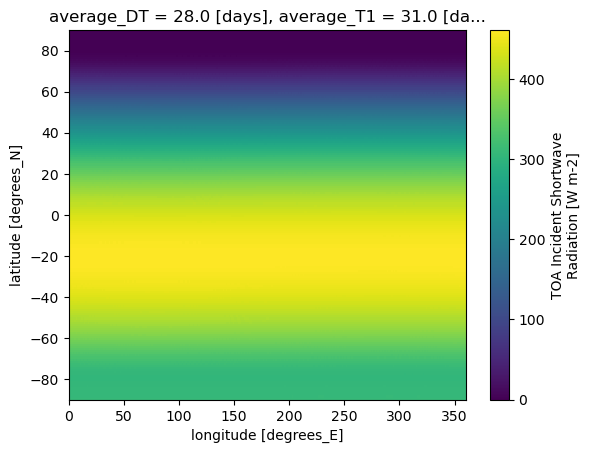

In [44]:
rsdt2d = ds.rsdt.isel(time=1).plot()